# Lab 5: DC Circuits

## Diego McHenry and Julia Gelfond

### March 7, 2024

Introduction: This lab revolves around building circuits which can be used to measure voltage and current through the circuit elements to determine if they are 'Ohmic'.

Set up:The tools used in this lab primarily include two DMMs, a snap cuicuit kit, and a power supply. Our lab starts with a power supply which generates a potential difference. This leads to current flowing into the circuit and accross its components. On the way, it crosses and ammeter which measures the current; it also crosses a variety of other components which can be mixed and matched to find information about their relationships: the potential difference between two different parts of the circuit can be found with the woltmeter as shows, extra resistance can be added with resistors, and other components like a light buld and diode are also provided for the experiment. Snap circuits are versitile, allowing us to arrange them in a variety of patterns to analyze different components. In the following experiments, the applied voltage will be varied while the current and voltage across certain components will be measured.

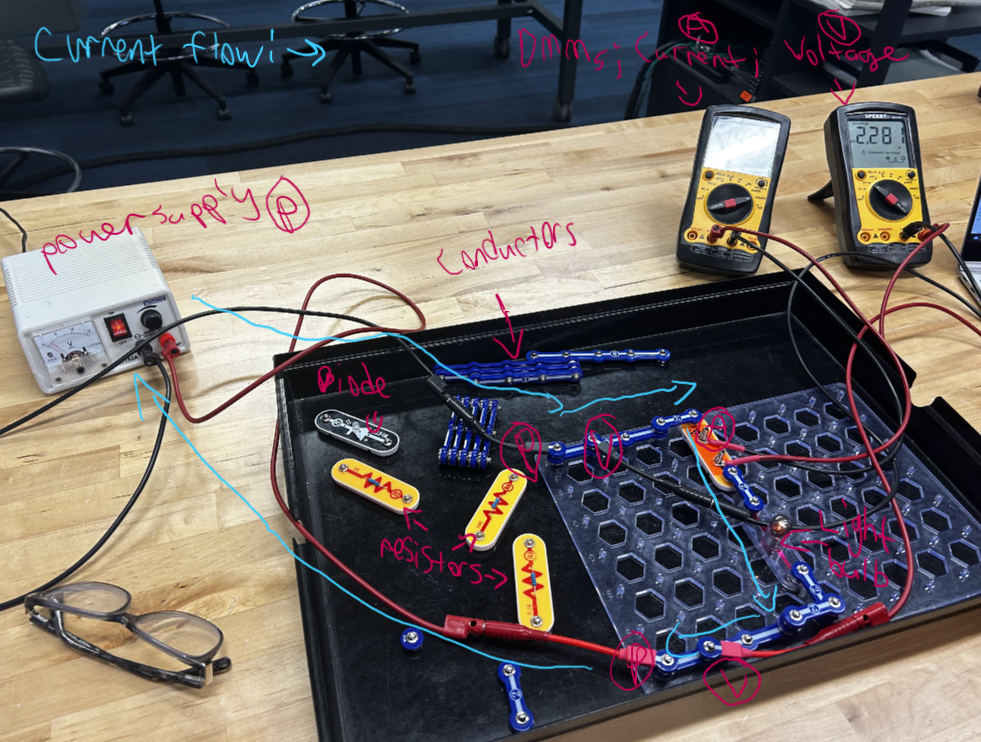

In [1]:
#potentially useful modules
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import math

import numpy as np

import scipy.optimize as opt

Data collection will occur in many steps. Rdata is the voltage and current through a resistor. Ldata is voltage and current through a light bulb. Finally, DF and DB data are the measurements of voltage and current through a forward and backward biased LED, respectively.

The data is collected and imported for analysis with Python.

In [2]:
Rdata = pd.read_excel("Rdata.xlsx")
Ldata = pd.read_excel("Ldata.xlsx")
DFdata = pd.read_excel("DFdata.xlsx")
DBdata = pd.read_excel("DBdata.xlsx")

Each set of data undergoes basic calculations to find error and standard units of measurements.

In [3]:
#convert uA to Amps
Rdata['Current (A)']=Rdata['Current (uA)']/1e6
Rdata['dCurrent (A)']=Rdata['dCurrent (uA)']/1e6

A model must now be fitted for the data.

In [4]:
def linmodel(x, A, B):
    y =  A*x**B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel, Rdata['Current (A)'],
                            Rdata['Voltage (V)'],
                            sigma=Rdata['dVoltage (V)'],
                            absolute_sigma=True) 
                            
    
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1]) 

In [5]:
#modify to include xerr
Rdata['yerrto'] = np.sqrt(((fitA *fitB*Rdata['Current (A)'])**(fitB-1)*Rdata['dCurrent (A)'])**2 + (Rdata['dVoltage (V)'])**2)

In [6]:
def linmodel(x, A, B):
    y =  A*x**B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel, Rdata['Current (A)'],
                            Rdata['Voltage (V)'],
                            sigma=Rdata['yerrto'],
                            absolute_sigma=True )
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1])    

#here are our values

print(f'{fitA:.3f}, +- {fitdA:.3f} (Constant)')
print(f'{fitB:.3f}, +- {fitdB:.3f} (Constant)')

5106.575, +- 160.396 (Constant)
1.000, +- 0.005 (Constant)



plot the data and model to get a visual

Text(0.5, 1.0, 'To Cross a Resistor')

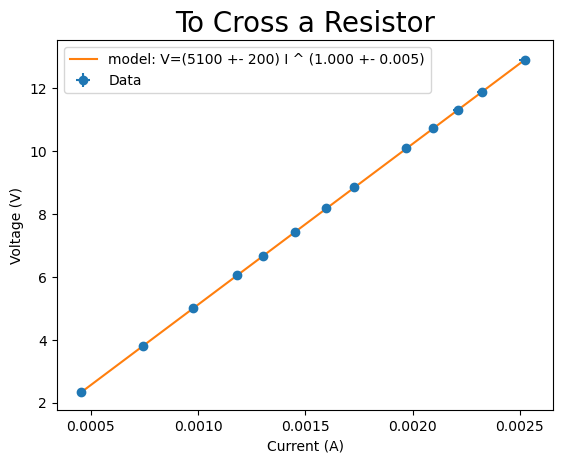

In [7]:
(plt.errorbar(Rdata['Current (A)'], Rdata['Voltage (V)'], 
              yerr=Rdata['dVoltage (V)'], xerr=Rdata['dCurrent (A)'], fmt="o", label='Data'))

plt.plot(Rdata['Current (A)'], linmodel(Rdata['Current (A)'], fitA, fitB), label='model: V=(5100 +- 200) I ^ (1.000 +- 0.005)')

plt.legend()
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title(('To Cross a Resistor'), fontsize = 20)

We now move on to the light bulb.

Like with the resistor, some basic calculations need to be performed.

In [8]:
Ldata['Current (A)']=Ldata['Current (mA)']/1e3
Ldata['dCurrent (A)']=Ldata['dCurrent (mA)']/1e3

And a model must be formed

In [9]:
def linmodel(x, A, B):
    y =  A*x**B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel, Ldata['Current (A)'],
                            Ldata['Voltage (V)'],
                            sigma=Ldata['dVoltage (V)'],
                            absolute_sigma=True) 
                            
    
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1]) 

In [10]:
#modify to include xerr
Ldata['yerrto'] = np.sqrt(((fitA *fitB*Ldata['Current (A)'])**(fitB-1)*Ldata['dCurrent (A)'])**2 + (Ldata['dVoltage (V)'])**2)

In [11]:
def linmodel(x, A, B):
    y =  A*x**B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel, Ldata['Current (A)'],
                            Ldata['Voltage (V)'],
                            sigma=Ldata['yerrto'],
                            absolute_sigma=True )
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1])    

#here are our values

print(f'{fitA:.3f}, +- {fitdA:.3f} (Constant)')
print(f'{fitB:.3f}, +- {fitdB:.3f} (Constant)')

65.225, +- 0.801 (Constant)
1.711, +- 0.009 (Constant)


These numbers are much less suggestive of an Ohmic Relationship

Text(0.5, 1.0, 'To Cross a Light Bulb')

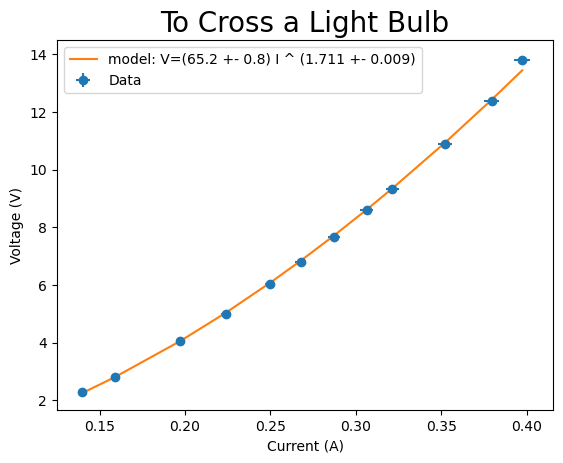

In [12]:
(plt.errorbar(Ldata['Current (A)'], Ldata['Voltage (V)'], 
             yerr=Ldata['dVoltage (V)'], xerr=Ldata['dCurrent (A)'], fmt="o", label='Data'))

plt.plot(Ldata['Current (A)'], linmodel(Ldata['Current (A)'], fitA, fitB), label='model: V=(65.2 +- 0.8) I ^ (1.711 +- 0.009)')

plt.legend()
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title(('To Cross a Light Bulb'), fontsize = 20)

The final part revolves around forward and backward biased diodes.

In [13]:
DFdata['Current (A)']=DFdata['Current (uA)']/1e6
DFdata['dCurrent (A)']=DFdata['dCurrent (uA)']/1e6
DBdata['Current (A)']=DBdata['Current (uA)']/1e6
DBdata['dCurrent (A)']=DBdata['dCurrent (uA)']/1e6

In [14]:
def linmodel(x, A, B):
    y =  A*x**B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel, DFdata['Current (A)'],
                            DFdata['Voltage (V)'],
                            sigma=DFdata['dVoltage (V)'],
                            absolute_sigma=True) 
                            
    
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1]) 

In [15]:
#modify to include xerr
DFdata['yerrto'] = (np.sqrt(((fitA *fitB*DFdata['Current (A)'])**(fitB-1)
                             *DFdata['dCurrent (A)'])**2 + (DFdata['dVoltage (V)'])**2))

In [16]:
def linmodel(x, A, B):
    y =  A*x**B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel, DFdata['Current (A)'],
                            DFdata['Voltage (V)'],
                            sigma=DFdata['yerrto'],
                            absolute_sigma=True )
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1])    

#here are our values

print(f'{fitA:.3f}, +- {fitdA:.3f} (Constant)')
print(f'{fitB:.3f}, +- {fitdB:.3f} (Constant)')

161.747, +- 2.977 (Constant)
0.557, +- 0.003 (Constant)


These values also dont represent an Ohmic system.

Text(0.5, 1.0, 'Duality of the Diode')

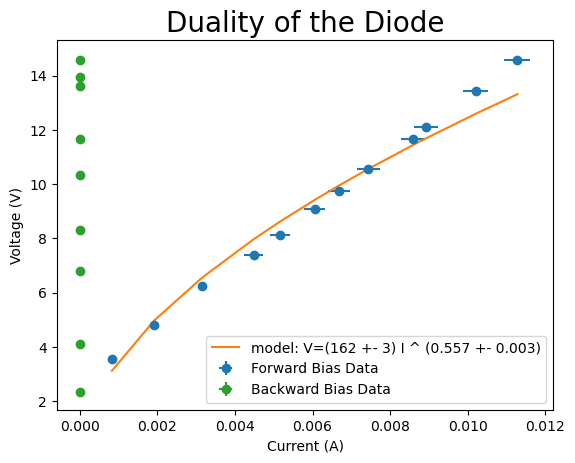

In [17]:
(plt.errorbar(DFdata['Current (A)'], DFdata['Voltage (V)'], 
              yerr=DFdata['dVoltage (V)'], xerr=DFdata['dCurrent (A)'], fmt="o", label='Forward Bias Data'))

plt.plot(DFdata['Current (A)'], linmodel(DFdata['Current (A)'], fitA, fitB), label='model: V=(162 +- 3) I ^ (0.557 +- 0.003)')

(plt.errorbar(DBdata['Current (A)'], DBdata['Voltage (V)'], 
              yerr=DBdata['dVoltage (V)'], xerr=DBdata['dCurrent (A)'], fmt="o", label='Backward Bias Data'))

plt.legend()
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title(('Duality of the Diode'), fontsize = 20)

Results, Error, and Significance.
The purpose of the lab is to evaluate a model under various conditions.

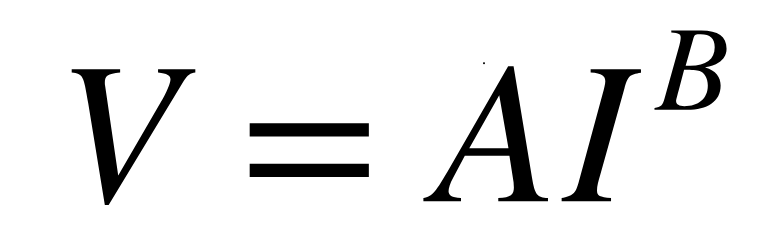

If an object is 'Ohmic' under a certain condition we expect A to be equal to resistance and B to be 1. This would gives Ohms law.

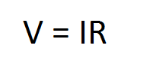


Here are our results

For our Resistor: 
A = 5100 +- 200 and B = 1.000 +- 0.005

For our Light Bulb: A = 65.2 +- 0.8 and B = 1.711 +- 0.009

For our Forward Biased Diode: A = 162 +- 3 and B = 0.557 +- 0.003

For our Backward Biased Diode: I was unable to model the data because the current was 0 or next to 0 for the entirety of the experiment.


There are not many sources of error for this lab. First, I will mention a small source of systematic error, being the disregard of the resistance of the conductors. Beyond that, error is limited to primarily instrumental error which is included in the data. Voltage has an error much larger in relative magnitude compared to Current. Since there is minimal error propogation since both were directly plotted, it is safe to say that the primary source of error is from the Voltage.

Taking a look at our calculated values, we notice some interesting things. First, the resistor tested returned remarkably Ohmic results with an exponent of 1 with a tiny associated error. Additionally, the resistance was 5.1k Ohms which was also accurately predicted by the experiment.. Next, the backward biased diode yielded quite awkward data. The most interesting pattern, however, is the difference between the lightbulb and the Forward Biased Diode. Both had a similar discrepency from an ohmic system in terms of magnitude, but the current on the Light bulb seemed to allow greated current as voltage increased while the Forward Biased Diode, relatively, allowed less current. They had opposite concavities. This is likely a result of the materials involved in the two and their properties.

In conclusion, only the resistor reacted in an Ohmic manner, but the Light Bulb and Diode raise some interesting questions.